# <center>Assignment 7 - Bayes Classification</center>

Bayes classification method can be applied for predicting a class based on probability
assessments.

Your task is to apply it for prediction of eventual divorce of a family.

You can train your model by use of the dataset Divorce Predictors hosted in the dataset
repository at https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set#.

Remember to explore and clean the data before using it for building a model.

Apply various preprocessing techniques you are familiar with for improving the accuracy of
the model, including dimensionality reduction and PCA, if appropriate.

Visualize the data and the process, as much as possible.

Apply another classification method of your choice and compare the results of it with Bayes
results.
***

## Step 1: Loading the libraries

In [1]:
# pandas to load data
import time
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

***
## Step 2: Loading the dataset

In [2]:
df = pd.read_excel('./../data/divorce.xlsx')

### Step 2.1: Understanding the dataset

Divorce Predictors dataset is consisting of 54 questionnaires which was carried out by using the Divorce Predictors Scale (DPS) on the basis of Gottman's couples therapy.

Questionnaire was taken place in Turkey.

All responses were collected on a 5 point scale

- 0 = Never
- 1 = Seldom
- 2 = Averagely
- 3 = Frequently
- 4 = Always

Target Variable –> Class

- 0 = Married
- 1 = Divorced

***
## Step 3: Analysing the dataset

In [3]:
# Check the format
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [4]:
# Check the rows and columns of the dataset.
df.shape

(170, 55)

In [5]:
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [6]:
# Group by Class and see the size of each group.
df.groupby('Class').size()

Class
0    86
1    84
dtype: int64

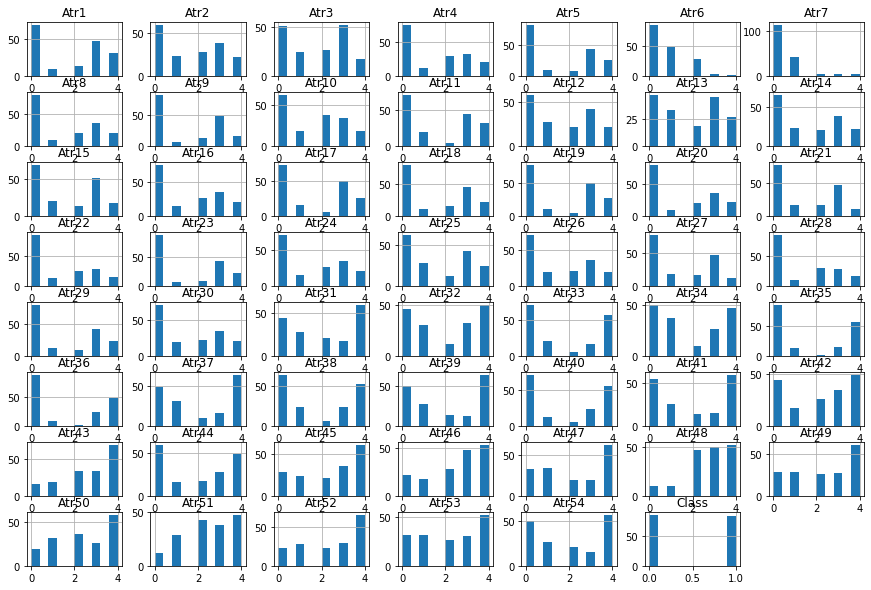

In [7]:
df.hist(figsize=(15,10))
plt.show()

### * Cleaning the dataset *

In [8]:
# Replace 0-1 with Divorced/Married.
df['Class'] = df['Class'].replace(to_replace=1, value='Divorced', regex=True)
df['Class'] = df['Class'].replace(to_replace=0, value='Married', regex=True)

In [9]:
# Rename column Class to Status.
df = df.rename(columns={"Class": "Status"})

In [10]:
# Replace column names 'Atr' with 'Qn'.
df.columns = df.columns.str.replace("Atr", "Qn ")

In [11]:
# Check for null values.

df.isnull().mean()

Qn 1      0.0
Qn 2      0.0
Qn 3      0.0
Qn 4      0.0
Qn 5      0.0
Qn 6      0.0
Qn 7      0.0
Qn 8      0.0
Qn 9      0.0
Qn 10     0.0
Qn 11     0.0
Qn 12     0.0
Qn 13     0.0
Qn 14     0.0
Qn 15     0.0
Qn 16     0.0
Qn 17     0.0
Qn 18     0.0
Qn 19     0.0
Qn 20     0.0
Qn 21     0.0
Qn 22     0.0
Qn 23     0.0
Qn 24     0.0
Qn 25     0.0
Qn 26     0.0
Qn 27     0.0
Qn 28     0.0
Qn 29     0.0
Qn 30     0.0
Qn 31     0.0
Qn 32     0.0
Qn 33     0.0
Qn 34     0.0
Qn 35     0.0
Qn 36     0.0
Qn 37     0.0
Qn 38     0.0
Qn 39     0.0
Qn 40     0.0
Qn 41     0.0
Qn 42     0.0
Qn 43     0.0
Qn 44     0.0
Qn 45     0.0
Qn 46     0.0
Qn 47     0.0
Qn 48     0.0
Qn 49     0.0
Qn 50     0.0
Qn 51     0.0
Qn 52     0.0
Qn 53     0.0
Qn 54     0.0
Status    0.0
dtype: float64

***
## Step 4: Training the dataset

In [12]:
# Convert the dataset into two arrays
array = df.values
# Create two (sub)arrays from it
X = array[:,0:54] # data without Status
y = array[:,54]   # just Status

In [13]:
# Split the dataset into two: 
#   80% of it as training data
#   20% as a validation dataset
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.2

# Initial value for randomization
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_set_size, random_state=seed)

### 4.1 Choose a model

#### <span style='color: #A2260B'>Logistic Regression</span>

In [14]:
# Time the event.
tic = time.perf_counter()

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 0.012771 seconds


In [15]:
# Check how good the fit of the model is on the train data.
train_accuracy = logistic_regression_model.score(X_train, y_train)
train_accuracy

1.0

In [16]:
# Check how good the fit of the model is on the test data.
test_accuracy = logistic_regression_model.score(X_test, y_test)
test_accuracy

1.0

In [17]:
# Test on the test data, try prediction
logistic_regression_prediction = logistic_regression_model.predict(X_test)
logistic_regression_prediction

array(['Married', 'Married', 'Divorced', 'Married', 'Divorced', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Divorced',
       'Married', 'Married', 'Married', 'Divorced', 'Divorced',
       'Divorced', 'Married', 'Divorced', 'Divorced', 'Married',
       'Married', 'Divorced', 'Divorced', 'Married', 'Married', 'Married',
       'Divorced', 'Married', 'Married', 'Divorced', 'Married',
       'Divorced'], dtype=object)

In [18]:
# Confusion matrix provides an indication of the the errors of prediction
print(confusion_matrix(y_test, logistic_regression_prediction))

[[13  0]
 [ 0 21]]


In [19]:
print(f"Completed the fit in {round((toc-tic)*1000, 6)} milliseconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")
print(f"The confusion matrix shows \033[1m\033[91mno\033[0m False Negative, and \033[1m\033[91mno\033[0m False Positive")

Completed the fit in 12.7709 milliseconds
The fit has a train set accuracy of 100.0 %
The fit has a test set accuracy of 100.0 %
The confusion matrix shows no False Negative, and no False Positive


***
#### <span style='color: #A2260B'>Multinomial NB</span>

In [20]:
# Time the event.
tic = time.perf_counter()

multinomial_model = MultinomialNB()
multinomial_model.fit(X_train, y_train)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 0.003495 seconds


In [21]:
# Check how good the fit of the model is on the train data.
train_accuracy = multinomial_model.score(X_train, y_train)
train_accuracy

0.9926470588235294

In [22]:
# Check how good the fit of the model is on the test data.
test_accuracy = multinomial_model.score(X_test, y_test)
test_accuracy

0.9705882352941176

In [23]:
# Test on the test data, try prediction
multinomial_prediction = multinomial_model.predict(X_test)
multinomial_prediction

array(['Married', 'Married', 'Divorced', 'Married', 'Divorced', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Divorced', 'Divorced',
       'Married', 'Married', 'Married', 'Divorced', 'Divorced',
       'Divorced', 'Married', 'Divorced', 'Divorced', 'Married',
       'Married', 'Divorced', 'Divorced', 'Married', 'Married', 'Married',
       'Divorced', 'Married', 'Married', 'Divorced', 'Married',
       'Divorced'], dtype='<U8')

In [24]:
# Confusion matrix provides an indication of the the errors of prediction
print(confusion_matrix(y_test, multinomial_prediction))

[[13  0]
 [ 1 20]]


#### <span style='color: #A2260B'><i>Conclusion</i></span>

In [25]:
print(f"Completed the fit in {round((toc-tic)*1000, 6)} milliseconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")
print(f"The confusion matrix shows \033[1m\033[91m1\033[0m False Negative, and \033[1m\033[91mno\033[0m False Positive")

Completed the fit in 3.4954 milliseconds
The fit has a train set accuracy of 99.3 %
The fit has a test set accuracy of 97.1 %
The confusion matrix shows 1 False Negative, and no False Positive


***
#### <span style='color: #A2260B'>GaussianNB</span>

In [26]:
# Time the event.
tic = time.perf_counter()

# Choose a model for fitting the data.
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 0.002924 seconds


In [27]:
# Check how good the fit of the model is on the train data.
train_accuracy = gaussian_model.score(X_train, y_train)
train_accuracy

0.9779411764705882

In [28]:
# Check how good the fit of the model is on the test data.
test_accuracy = gaussian_model.score(X_test, y_test)
test_accuracy

0.9705882352941176

In [29]:
# Test on the test data, try prediction
gaussian_prediction = gaussian_model.predict(X_test)
gaussian_prediction

array(['Divorced', 'Married', 'Divorced', 'Married', 'Divorced',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Divorced', 'Married', 'Married', 'Married', 'Divorced',
       'Divorced', 'Divorced', 'Married', 'Divorced', 'Divorced',
       'Married', 'Married', 'Divorced', 'Divorced', 'Married', 'Married',
       'Married', 'Divorced', 'Married', 'Married', 'Divorced', 'Married',
       'Divorced'], dtype='<U8')

In [30]:
# Confusion matrix provides an indication of the the errors of prediction
print(confusion_matrix(y_test, gaussian_prediction))

[[13  0]
 [ 1 20]]


#### <span style='color: #A2260B'><i>Conclusion</i></span>

In [31]:
print(f"Completed the fit in {round((toc-tic)*1000, 6)} milliseconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")
print(f"The confusion matrix shows \033[1m\033[91m1\033[0m False Negative, and \033[1m\033[91mno\033[0m False Positive")

Completed the fit in 2.9235 milliseconds
The fit has a train set accuracy of 97.8 %
The fit has a test set accuracy of 97.1 %
The confusion matrix shows 1 False Negative, and no False Positive


***
## Step 5: Applying dimensionality reduction (PCA)

In [32]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

#### <span style='color: #A2260B'>Using PCA to reduce to <u>10</u> columns.</span>

In [33]:
pca = PCA(n_components=10)
new_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
components = pca.fit_transform(X)
df_10 = pd.DataFrame(data = components, columns = new_columns)
array_10 = df_10.values
finalDf_10 = pd.concat([df_10, df[['Status']]], axis = 1)

In [34]:
X_train_10, X_test_10, y_train_10, y_test_10 = model_selection.train_test_split(
    array_10, 
    y, 
    test_size = test_set_size, 
    random_state = seed
)

In [35]:
# Time the event.
tic = time.perf_counter()

logistic_regression_model_2 = GaussianNB()
logistic_regression_model_2.fit(X_train_10, y_train_10)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 0.001487 seconds


In [36]:
array_10[1]

array([ 3.96177646,  1.96403221, -0.3416726 , -0.95132644,  1.80444988,
       -1.49942516,  0.88613399,  2.39019262,  1.54750339,  1.8281512 ])

In [37]:
train_accuracy = logistic_regression_model_2.score(X_train_10, y_train_10)
train_accuracy

0.9926470588235294

In [38]:
test_accuracy = logistic_regression_model_2.score(X_test_10, y_test_10)
test_accuracy

1.0

In [48]:
print(f"Completed the fit in {round((toc-tic)*1000, 6)} milliseconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")

Completed the fit in 2.3653 milliseconds
The fit has a train set accuracy of 99.3 %
The fit has a test set accuracy of <u>100.0</u> %


#### <span style='color: #A2260B'>Using PCA to reduce to <u>2</u> columns.</span>

In [40]:
pca = PCA(n_components=2)
new_columns = ['Principal Component 1', 'Principal Component 2']
components = pca.fit_transform(X)
df_2 = pd.DataFrame(data = components, columns = new_columns)
array_2 = df_2.values
finalDf_2 = pd.concat([df_2, df[['Status']]], axis = 1)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = model_selection.train_test_split(
    array_2, 
    y, 
    test_size = test_set_size, 
    random_state = seed
)

In [42]:
# Time the event.
tic = time.perf_counter()

logistic_regression_model_2 = GaussianNB()
logistic_regression_model_2.fit(X_train_2, y_train_2)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 0.002365 seconds


In [43]:
train_accuracy = logistic_regression_model_2.score(X_train_2, y_train_2)
train_accuracy

0.9926470588235294

In [44]:
test_accuracy = logistic_regression_model_2.score(X_test_2, y_test_2)
test_accuracy

1.0

In [45]:
print(f"Completed the fit in {round((toc-tic)*1000, 6)} milliseconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")

Completed the fit in 2.3653 milliseconds
The fit has a train set accuracy of 99.3 %
The fit has a test set accuracy of 100.0 %


In [46]:
# See the new principal component columns with the status column as a new dataset.
finalDf_2

,Principal Component 1,Principal Component 2,Status
0,-3.321160,-0.136881,Divorced
1,3.961776,1.964032,Divorced
2,1.476972,2.527871,Divorced
3,3.276717,3.093867,Divorced
4,-3.742419,0.187122,Divorced
...,...,...,...
165,-5.165177,0.068181,Married
166,-5.382432,-2.294147,Married
167,-5.222363,-0.367037,Married
168,-5.271690,-2.030218,Married


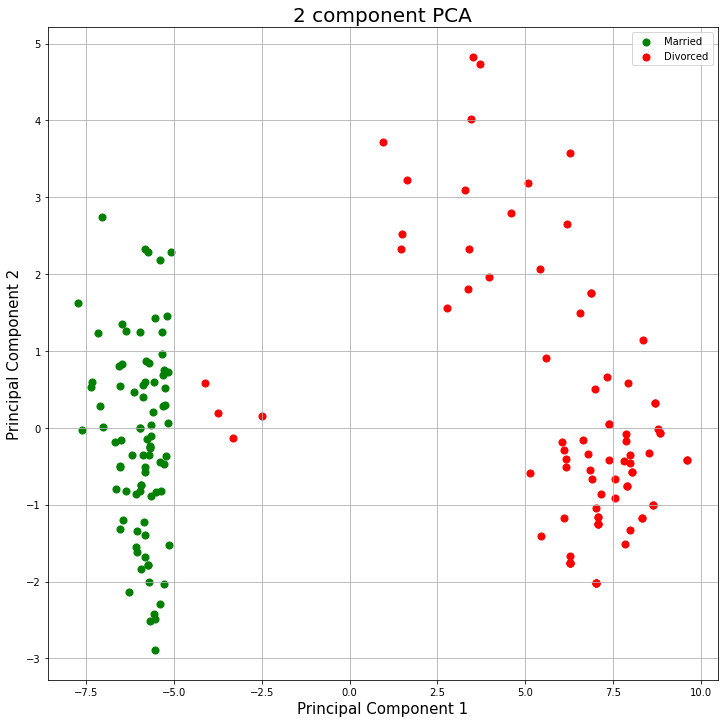

In [47]:
# Visualize the new reduced dataset as a 2D diagram.

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Married', 'Divorced']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_2['Status'] == target
    ax.scatter(finalDf_2.loc[indicesToKeep, 'Principal Component 1']
               , finalDf_2.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

***
## Step 5: Final conclusions

#### We've used 3 different models for predicting the result of a given marriage questionary

#### 